In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import get_data, get_return_simulation, add_dca_transactions

plt.style.use("seaborn")


In [2]:
PATH = "../data/stock_returns.csv"
stocks = ["AAPL", "MSFT"]


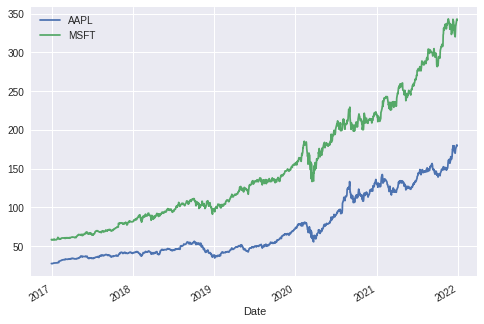

In [3]:
df = get_data(path=PATH, stocks=stocks)
df.plot()
plt.show()


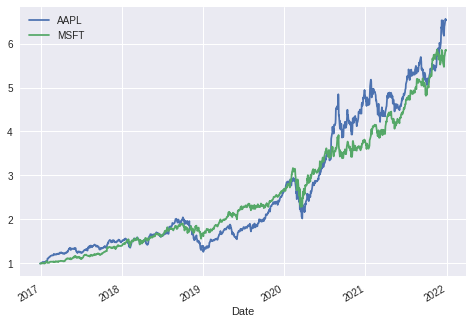

In [4]:
daily_cum_returns = (df.pct_change() + 1).cumprod()
daily_cum_returns.plot()
plt.show()


In [5]:
SMA1 = 20
SMA2 = 50

import pprint

for s in stocks:
    df[f"{s}_SMA{SMA1}"] = df[s].rolling(SMA1).mean()
    df[f"{s}_SMA{SMA2}"] = df[s].rolling(SMA2).mean()
    df[f"{s}_POSITION"] = np.where(
        df[f"{s}_SMA{SMA1}"] > df[f"{s}_SMA{SMA2}"], 1, 0
    )

    # indicates how many shares to buy
    df[f"{s}_TRANSACTIONS"] = df[f"{s}_POSITION"].diff().clip(lower=0)
    df.loc[df.index[0], f"{s}_TRANSACTIONS"] = 1

print('moving average crossing strategy')
pprint.pprint(get_return_simulation(df, stocks))




moving average crossing strategy
{'AAPL': {'amount invested': 972.9850044250488,
          'base returns': 6.5397461567582145,
          'strategy returns': 2.610174091671956},
 'MSFT': {'amount invested': 2113.3897819519043,
          'base returns': 5.857425040184969,
          'strategy returns': 2.1220107207020256}}


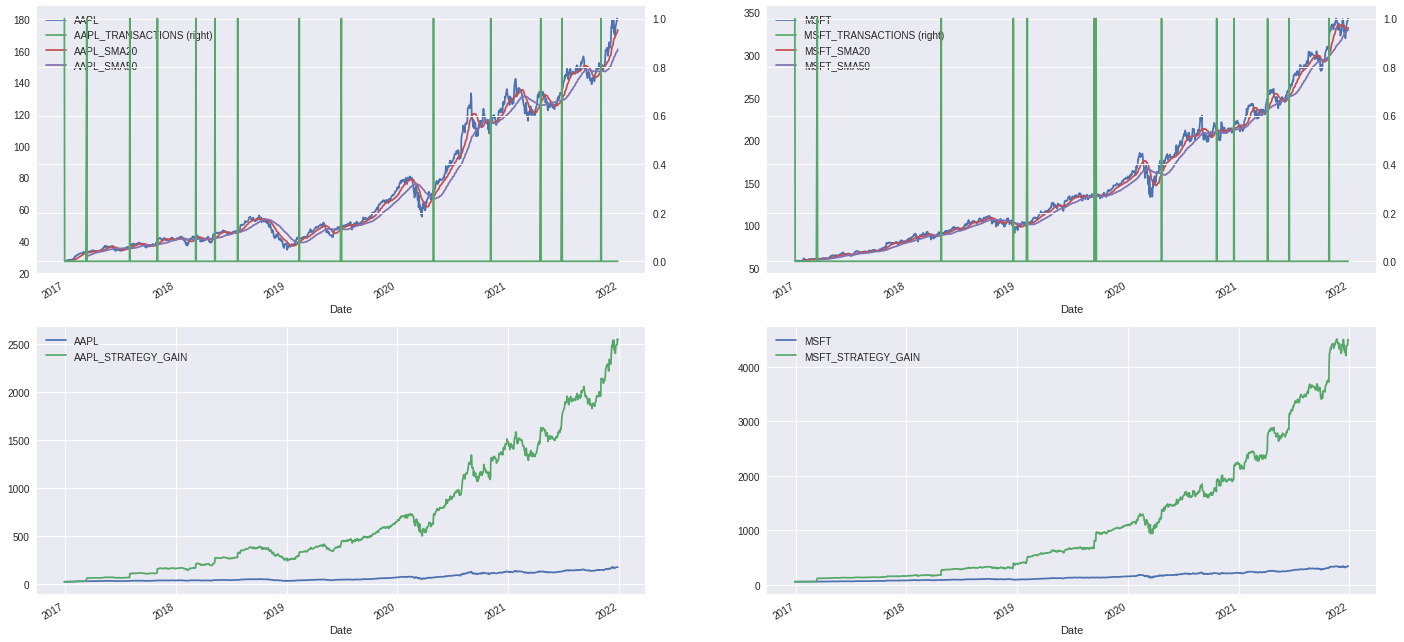

In [6]:
def display_strategy(df, stocks):
    fig, axes = plt.subplots(nrows=len(stocks), ncols=2)
    
    for i, s in enumerate(stocks):
        df[[s, f"{s}_TRANSACTIONS", f"{s}_SMA{SMA1}", f"{s}_SMA{SMA2}"]].plot(
            figsize=(24, 12), secondary_y=f"{s}_TRANSACTIONS", ax=axes[i // 2, i % 2]
        )
        df[[s, f"{s}_STRATEGY_GAIN"]].plot( ax=axes[i // 2 + 1, i % 2])

display_strategy(df, stocks)

dca strategy
{'AAPL': {'amount invested': 4365.888648986816,
          'base returns': 6.5397461567582145,
          'strategy returns': 2.527259857520242},
 'MSFT': {'amount invested': 8999.1667137146,
          'base returns': 5.857425040184969,
          'strategy returns': 2.3187247885617572}}


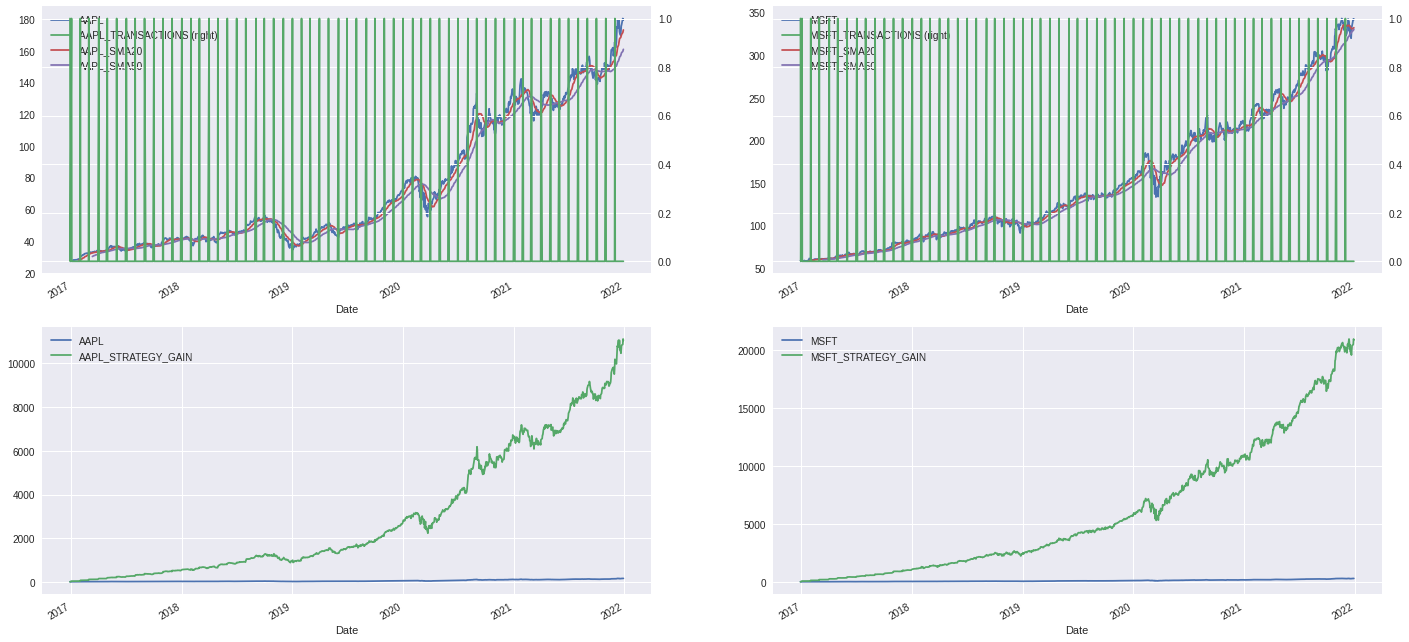

In [7]:
add_dca_transactions(df, stocks)
print('dca strategy')
pprint.pprint(get_return_simulation(df, stocks))

display_strategy(df, stocks)